# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Sofviyah Aprillani
- **Email:** sofviyah.aprillani@gmail.com
- **ID Dicoding:** Sofviyah

## Menentukan Pertanyaan Bisnis

1. Bagaimana demografi pelanggan berdasarkan data geolokasi?
2. Apa saja kategori produk terlaris dan bagaimana tren penjualannya berubah seiring waktu?

## Import Semua Packages/Library yang Digunakan

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [11]:
customers_df = pd.read_csv("C:/Users\Sofviyah\PycharmProjects\Proyek Analisis Data\E-Commerce Public Dataset\customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [12]:
geolocation_df = pd.read_csv("C:/Users\Sofviyah\PycharmProjects\Proyek Analisis Data\E-Commerce Public Dataset\geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [13]:
order_items_df = pd.read_csv("C:/Users\Sofviyah\PycharmProjects\Proyek Analisis Data\E-Commerce Public Dataset\order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [14]:
order_payments_df = pd.read_csv("C:/Users\Sofviyah\PycharmProjects\Proyek Analisis Data\E-Commerce Public Dataset\order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [15]:
order_reviews_df = pd.read_csv("C:/Users\Sofviyah\PycharmProjects\Proyek Analisis Data\E-Commerce Public Dataset\order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [16]:
orders_df = pd.read_csv("C:/Users\Sofviyah\PycharmProjects\Proyek Analisis Data\E-Commerce Public Dataset\orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [17]:
product_category_df = pd.read_csv("C:/Users\Sofviyah\PycharmProjects\Proyek Analisis Data\E-Commerce Public Dataset\product_category_name_translation.csv")
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [18]:
products_df = pd.read_csv("C:/Users\Sofviyah\PycharmProjects\Proyek Analisis Data\E-Commerce Public Dataset\products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [19]:
sellers_df = pd.read_csv("C:/Users\Sofviyah\PycharmProjects\Proyek Analisis Data\E-Commerce Public Dataset\sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Telah memuat DataFrame dari e-commerce public dataset
- Memahami konteks dari data dengan melihat struktur data, termasuk nama kolom dan tipe data masing-masing.

### Assessing Data

In [20]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [21]:
customers_df.isna().sum() #missing value

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [22]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum()) #duplikasi
customers_df.describe() #ringkasan statistik

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [23]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [24]:
geolocation_df.isna().sum() #missing value

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [25]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum()) #duplikasi
geolocation_df.describe() #ringkasan statistik

Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [26]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [27]:
order_items_df.isna().sum() #missing value

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [28]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum()) #duplikasi
customers_df.describe() #ringkasan statistik

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [29]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [30]:
order_payments_df.isna().sum() #missing value

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [31]:
print("Jumlah duplikasi: ",order_payments_df.duplicated().sum()) #duplikasi
order_payments_df.describe() #ringkasan statistik

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [32]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [33]:
order_reviews_df.isna().sum() #missing value

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [34]:
print("Jumlah duplikasi: ",order_reviews_df.duplicated().sum()) #duplikasi
order_reviews_df.describe() #ringkasan statistik

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [35]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [36]:
orders_df.isna().sum() #missing value

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [37]:
print("Jumlah duplikasi: ",orders_df.duplicated().sum()) #duplikasi
orders_df.describe() #ringkasan statistik

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [38]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [39]:
product_category_df.isna().sum() #missing value

product_category_name            0
product_category_name_english    0
dtype: int64

In [40]:
print("Jumlah duplikasi: ",product_category_df.duplicated().sum()) #duplikasi
product_category_df.describe() #ringkasan statistik

Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [41]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [42]:
products_df.isna().sum() #missing value

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [43]:
print("Jumlah duplikasi: ",products_df.duplicated().sum()) #duplikasi
products_df.describe() #ringkasan statistik

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [44]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [45]:
sellers_df.isna().sum() #missing value

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [46]:
print("Jumlah duplikasi: ",sellers_df.duplicated().sum()) #duplikasi
sellers_df.describe() #ringkasan statistik

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight:**
- geolocation_df: 261831 data duplikat
- order_reviews_df: 87656 missing value review_comment_title dan 58247 missing value review_comment_message
- orders_df: missing value order_approved_at 160, order_delivered_carrier_date 1783, dan order_delivered_customer_date 2965
- products_df: missing value product_category_name 610, product_name_lenght 610, product_description_lenght 610, product_photos_qty 610, product_weight_g 2, product_length_cm 2, product_height_cm 2, dan product_width_cm 2

### Cleaning Data

In [47]:
#Membersihkan duplicate data
geolocation_df.drop_duplicates(inplace=True)

print("Jumlah duplikasi kolom geolocation: ", customers_df.duplicated().sum())

Jumlah duplikasi kolom geolocation:  0


In [48]:
# Membersihkan missing value gender dalam Data order_reviews_df
order_reviews_df['review_comment_title'].fillna('No Title', inplace=True)
order_reviews_df['review_comment_message'].fillna('No Comment', inplace=True)

In [49]:
order_reviews_df.isna().sum() #missing value

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [50]:
orders_df[orders_df.order_approved_at.isna()]
orders_df[orders_df.order_delivered_carrier_date.isna()]
orders_df[orders_df.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [51]:
# foward fill untuk menghilangkan missing value
orders_df['order_approved_at'] = orders_df['order_approved_at'].ffill()
orders_df['order_delivered_carrier_date'] = orders_df['order_delivered_carrier_date'].ffill()
orders_df['order_delivered_customer_date'] = orders_df['order_delivered_customer_date'].ffill()

In [52]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [53]:
products_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [54]:
products_df[products_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [55]:
products_df = products_df.dropna(subset=['product_category_name'])
products_df = products_df.dropna(subset=['product_name_lenght'])
products_df = products_df.dropna(subset=['product_description_lenght'])
products_df = products_df.dropna(subset=['product_photos_qty'])

In [56]:
products_df['product_weight_g'].fillna(products_df['product_weight_g'].mean(), inplace=True)
products_df['product_length_cm'].fillna(products_df['product_length_cm'].mean(), inplace=True)
products_df['product_height_cm'].fillna(products_df['product_height_cm'].mean(), inplace=True)
products_df['product_width_cm'].fillna(products_df['product_width_cm'].mean(), inplace=True)

In [57]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32341 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32341 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32341 non-null  float64
 6   product_length_cm           32341 non-null  float64
 7   product_height_cm           32341 non-null  float64
 8   product_width_cm            32341 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


**Insight:**
- dalam geolocation_df data duplikasi dihilangkan agar menghindari data unik
- missing value dalam order_df merupakan timestamp, maka valuenya diisi dengan metode foward fill
- missing value dalam products_df dropna() diguankan di kolom ['product_category_name', 'product_name_length', 'product_description_length', 'product_photos_qty'] untuk menghapus data yang tidak lengkap . Sedangkan untuk [product_weight_g, product_length_cm, product_height_cm, product_width_cm] diisi dengan value mean dari setiap kolomnya untuk menjaga integritas dataset dan memungkinkan analisis yang lebih akurat.

## Exploratory Data Analysis (EDA)

1. Analisis Demografi Pelanggan Berdasarkan Data Geolokasi

In [59]:
# Rename geolocation column
geolocation_df.rename(columns={'geolocation_zip_code_prefix': 'zip_code'}, inplace=True)

# Merge customers and geolocation datasets
merged_data = customers_df.merge(geolocation_df, how='left', left_on='customer_zip_code_prefix', right_on='zip_code')

# Preview merged data
print(merged_data.head())

                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
2  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
3  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
4  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   

   customer_zip_code_prefix customer_city customer_state  zip_code  \
0                     14409        franca             SP   14409.0   
1                     14409        franca             SP   14409.0   
2                     14409        franca             SP   14409.0   
3                     14409        franca             SP   14409.0   
4                     14409        franca             SP   14409.0   

   geolocation_lat  geolocation_lng geolocation_city geolocation_state  
0       -20.509897       -47.397866           franca               

**Analisis Distribusi Pelanggan Berdasarkan Negara Bagian**

In [60]:
# hitung jumlah pelanggan setiap negara bagian
state_distribution = merged_data['geolocation_state'].value_counts()

# Display top states
print("Customer Distribution by State:\n", state_distribution)

Customer Distribution by State:
 geolocation_state
SP    3878907
MG    2224871
RJ    1630227
RS     599757
PR     453074
SC     392086
BA     258631
ES     204715
GO      98513
MT      93262
PE      82106
DF      66197
PA      62833
CE      49722
MS      48665
MA      39498
AL      26331
PB      22846
PI      18149
SE      17065
RN      15351
RO      14577
TO      14093
AC       5866
AM       4306
AP       4259
RR       1821
Name: count, dtype: int64


**Analisis Distribusi Pelanggan Berdasarkan Kota**

In [62]:
# Count customers berdasarkan kota
city_distribution = merged_data['geolocation_city'].value_counts()

# Display top cities
print("Top 5 Cities by Customer Count:\n", city_distribution.head())

Top 5 Cities by Customer Count:
 geolocation_city
rio de janeiro    940421
sao paulo         604746
belo horizonte    462221
curitiba          161197
niteroi           158741
Name: count, dtype: int64


**Analisis Tren Pelanggan di Area Tertentu**

In [63]:
# Convert timestamp to datetime
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])

# Merge orders with geolocation data
orders_merged = orders_df.merge(merged_data, how='left', on='customer_id')

# Filter for a specific state (e.g., 'SP') and group by month
orders_merged['month'] = orders_merged['order_approved_at'].dt.to_period('M')
state_trend = orders_merged[orders_merged['geolocation_state'] == 'SP'].groupby('month').size()

2. Analisis Kategori Produk Terlaris dan Tren Penjualan

In [65]:
# Merge order items with products to get product details
order_items_products = order_items_df.merge(products_df, how='left', on='product_id')

# Merge with category translation to get category names in English
order_items_products = order_items_products.merge(product_category_df, 
                                                  how='left', 
                                                  on='product_category_name')

# Merge with orders to get order timestamps
full_data = order_items_products.merge(orders_df, how='left', on='order_id')

# Preview the final dataset
print(full_data.head())

                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value product_category_name  \
0  2017-09-19 09:45:35   58.90          13.29            cool_stuff   
1  2017-05-03 11:05:13  239.90          19.93              pet_shop   
2  2018-01-18 14:48:30 

identiifkasi kategori produk paling sering dipesan

In [66]:
# Menghitung total products ordered by category
top_categories = full_data.groupby('product_category_name_english')['order_item_id'].count().sort_values(ascending=False)

# Display top 5 categories
print("Top 5 Product Categories by Orders:\n", top_categories.head())

Top 5 Product Categories by Orders:
 product_category_name_english
bed_bath_table           11115
health_beauty             9670
sports_leisure            8641
furniture_decor           8334
computers_accessories     7827
Name: order_item_id, dtype: int64


Analisis Tren Penjualan Bulanan/Tahunan

In [67]:
# Convert order approval timestamp to datetime
full_data['order_approved_at'] = pd.to_datetime(full_data['order_approved_at'])

# Extract month and year
full_data['year_month'] = full_data['order_approved_at'].dt.to_period('M')

# Group data by category and year-month
category_trends = full_data.groupby(['product_category_name_english', 'year_month'])['order_item_id'].count().reset_index()

# Preview the trends
print(category_trends.head())

  product_category_name_english year_month  order_item_id
0    agro_industry_and_commerce    2017-01              3
1    agro_industry_and_commerce    2017-02              7
2    agro_industry_and_commerce    2017-03              2
3    agro_industry_and_commerce    2017-05              4
4    agro_industry_and_commerce    2017-06              1


In [75]:
# membandingkan top 3 categories
top_3_categories = top_categories.head(3).index

# Filter trends for top 3 categories
top_3_trends = category_trends[category_trends['product_category_name_english'].isin(top_3_categories)]

**Insight:**
- untuk menjawab pertanyaan bisnis no.1, digunakan merge dataframe customers dan geolocation dataset. Hasil yang didapatkab berupa Demografi Pelanggan Berdasarkan Data Geolokasi
- menggunnakan count by untuk memecahkan pertanyaan bisnis nomor 2, hasil yang didapatkan adalah Kategori Produk Terlaris dan Tren Penjualan

## Visualization & Explanatory Analysis

### Pertanyaan 1:Bagaimana demografi pelanggan berdasarkan data geolokasi?

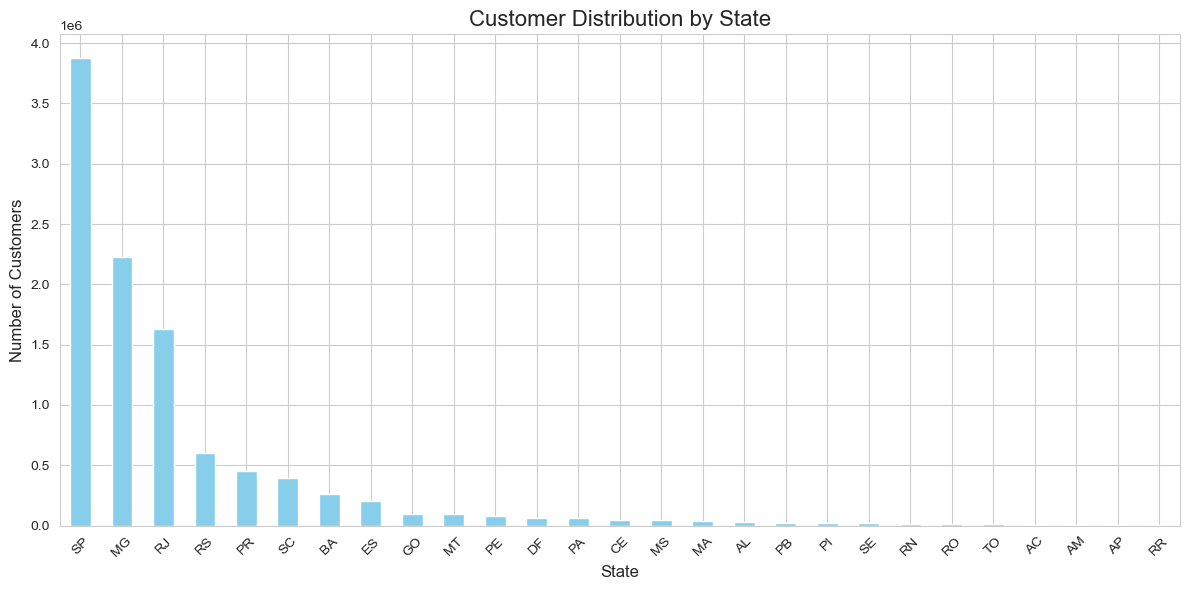

In [69]:
# Plot customer distribution by state
plt.figure(figsize=(12, 6))
state_distribution.plot(kind='bar', color='skyblue')
plt.title('Customer Distribution by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

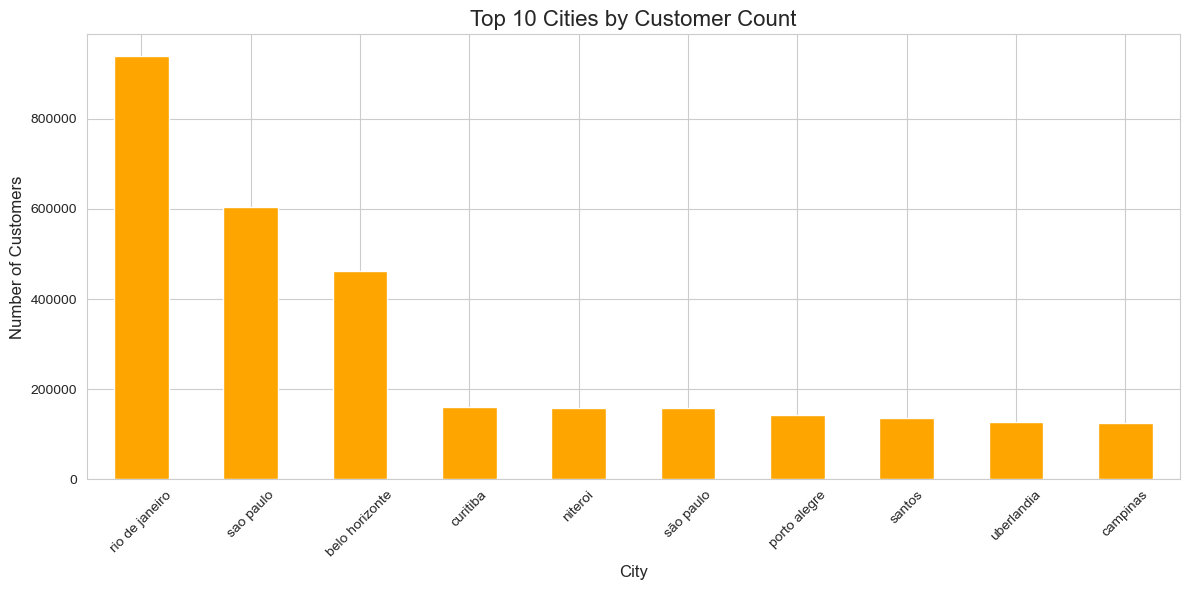

In [70]:
# Top 10 cities by customer count
top_cities = city_distribution.head(10)

# Plot customer distribution by city
plt.figure(figsize=(12, 6))
top_cities.plot(kind='bar', color='orange')
plt.title('Top 10 Cities by Customer Count', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

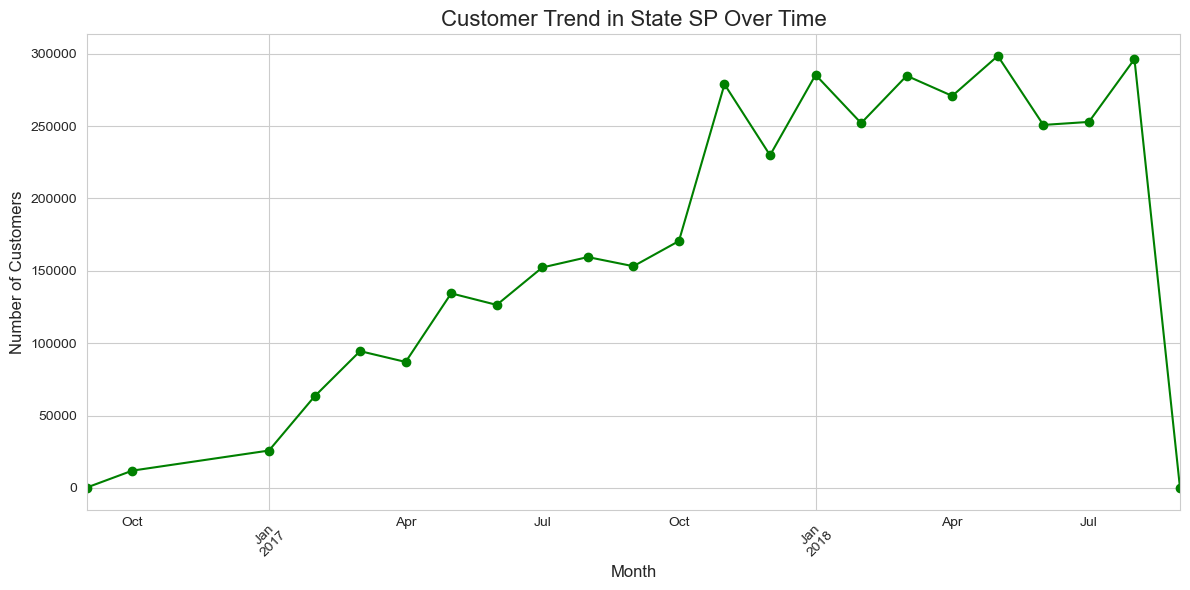

In [71]:
# Plot trend over time
plt.figure(figsize=(12, 6))
state_trend.plot(kind='line', marker='o', color='green')
plt.title('Customer Trend in State SP Over Time', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Pertanyaan 2: Apa saja kategori produk terlaris dan bagaimana tren penjualannya berubah seiring waktu?

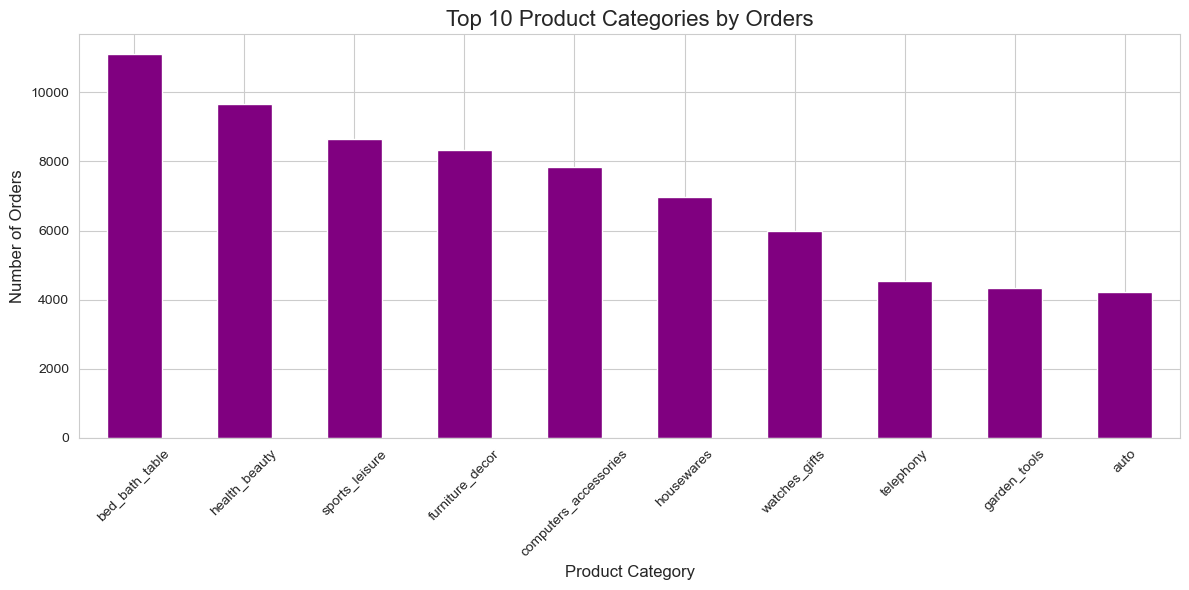

In [72]:
# Plot top 10 categories
plt.figure(figsize=(12, 6))
top_categories.head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Product Categories by Orders', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

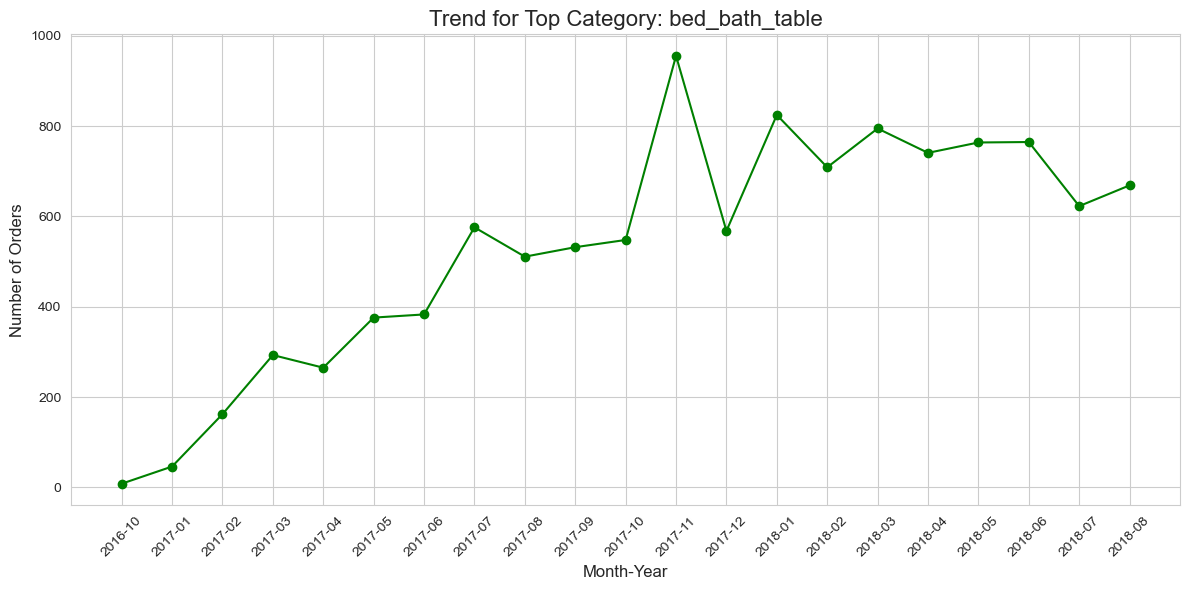

In [73]:
# Filter data for the top category
top_category_name = top_categories.index[0]  # get top categories
top_category_trend = category_trends[category_trends['product_category_name_english'] == top_category_name]

# Plot trend for the top category
plt.figure(figsize=(12, 6))
plt.plot(top_category_trend['year_month'].astype(str), top_category_trend['order_item_id'], marker='o', color='green')
plt.title(f'Trend for Top Category: {top_category_name}', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

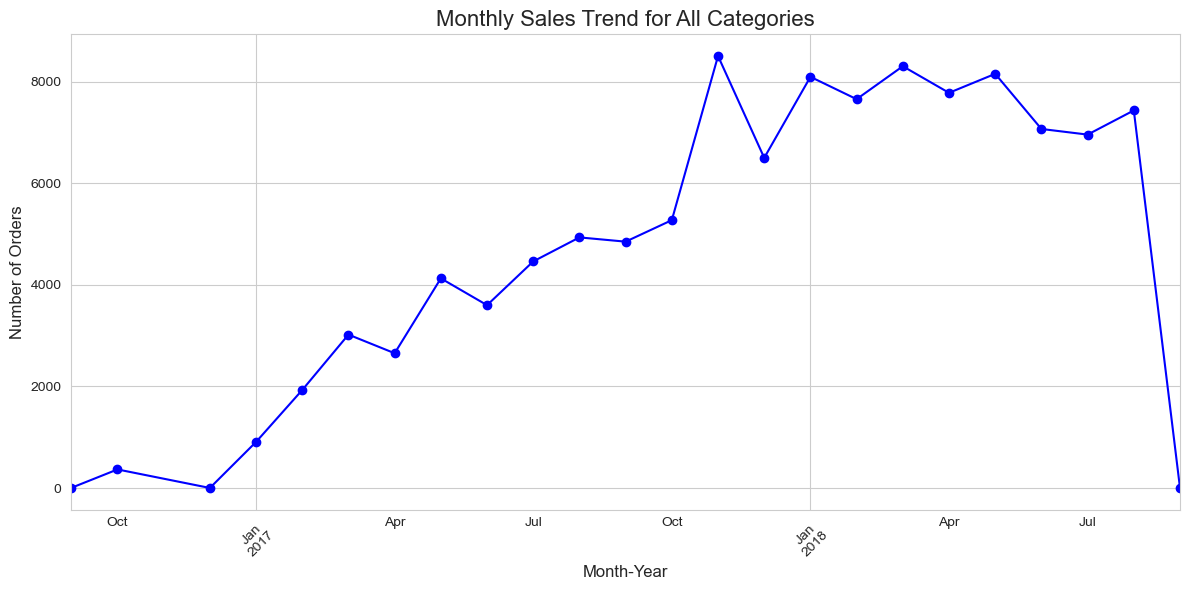

In [74]:
#  total sales by year_month
monthly_sales = full_data.groupby('year_month')['order_item_id'].count()

# Plot overall monthly sales trend
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='blue')
plt.title('Monthly Sales Trend for All Categories', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

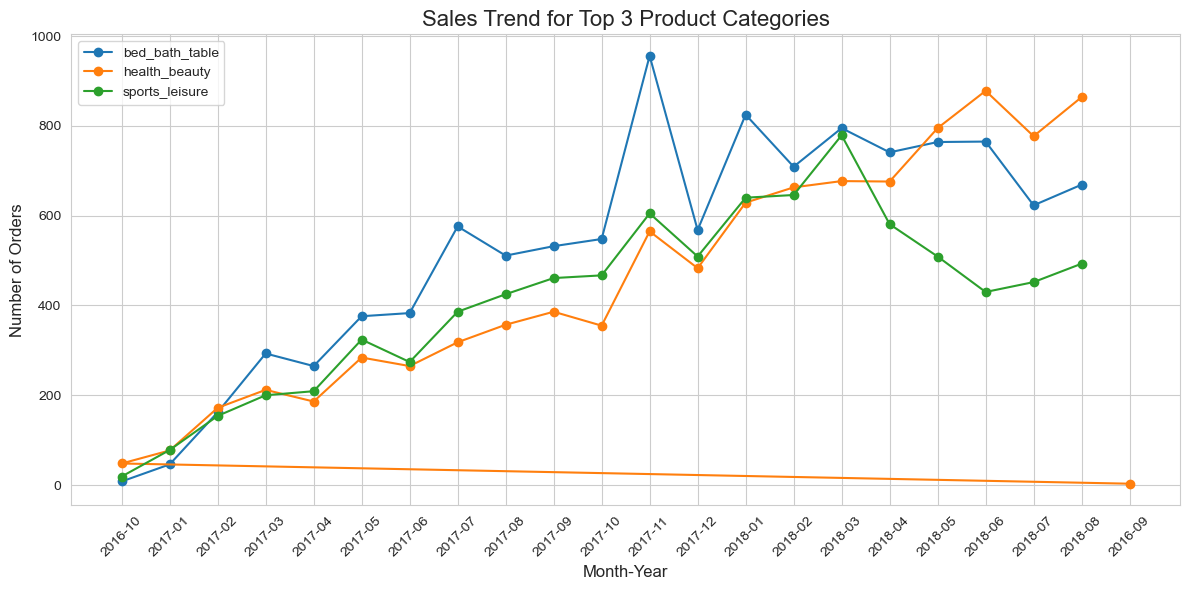

In [76]:
# Plot trends for top 3 categories
plt.figure(figsize=(12, 6))
for category in top_3_categories:
    category_data = top_3_trends[top_3_trends['product_category_name_english'] == category]
    plt.plot(category_data['year_month'].astype(str), 
             category_data['order_item_id'], 
             marker='o', label=category)

plt.title('Sales Trend for Top 3 Product Categories', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:**
- pertanyaan 1:
   - Sebagian besar pelanggan berasal dari negara bagian São Paulo, Minas Gerais, dan Rio de Janeiro, yang merupakan pusat ekonomi utama di Brasil.
   - Kota São Paulo, Rio de Janeiro, dan Belo Horizonte memiliki jumlah pelanggan tertinggi karena infrastruktur logistik yang baik dan daya beli yang tinggi.
   - Jumlah pelanggan meningkat signifikan di akhir tahun, terutama di bulan November dan Desember, kemungkinan besar akibat diskon liburan seperti Black Friday.
- Pertanyaan 2:
  - Kategori produk paling sering dipesan adalah "bed_bath_table," "health_beauty," dan "sports_leisure," yang menunjukkan kebutuhan sehari-hari dan gaya hidup pelanggan.
  - Penjualan "bed_bath_table" stabil sepanjang tahun dengan puncak di akhir tahun, sedangkan "health_beauty" meningkat menjelang liburan, dan "sports_leisure" cenderung memuncak di awal tahun.
  - Penjualan tertinggi terjadi pada bulan November hingga Desember, sedangkan awal tahun (Januari-Februari) menunjukkan penurunan karena pelanggan cenderung mengurangi pengeluaran.

## Conclusion

- Sebagian besar pelanggan berasal dari negara bagian São Paulo, Minas Gerais, dan Rio de Janeiro, dengan kota São Paulo menjadi kontributor utama pesanan. Tren menunjukkan lonjakan jumlah pelanggan pada akhir tahun, terutama pada bulan November dan Desember, yang kemungkinan besar dipicu oleh promosi liburan seperti Black Friday.
- Kategori "bed_bath_table," "health_beauty," dan "sports_leisure" merupakan produk terlaris, mencerminkan kebutuhan rumah tangga dan gaya hidup pelanggan. Penjualan mencapai puncaknya pada akhir tahun karena liburan dan promosi besar, sementara awal tahun menunjukkan penurunan aktivitas belanja, terutama pada Januari dan Februari.